<a href="https://colab.research.google.com/github/WonminSong/AI/blob/master/categorical_feature_encoding_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [81]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/AI/cat-in-the-dat")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
train = pd.read_csv('/content/drive/My Drive/AI/cat-in-the-dat/train.csv')
test = pd.read_csv('/content/drive/My Drive/AI/cat-in-the-dat/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/AI/cat-in-the-dat/sample_submission.csv', index_col='id')

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [84]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [85]:
train.tail()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,Piano,e1558b071,0000ee65f,c8ae4ea14,1f820c7ce,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1
299999,299999,0,0,0,F,Y,Blue,Trapezoid,Dog,Russia,Bassoon,416a8f3ab,8d1b72979,c073efb40,c13d3ebdf,ad1af2b45,3,Contributor,Freezing,i,R,tP,1,3,0


In [86]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

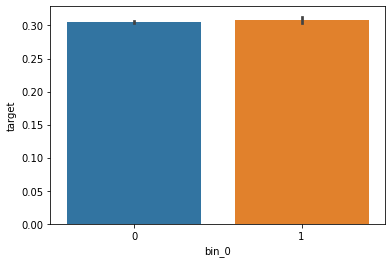

In [87]:
sns.barplot(x="bin_0",y="target",data=train);

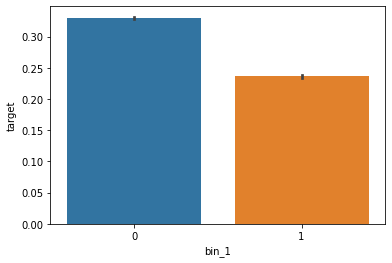

In [88]:
sns.barplot(x="bin_1",y="target",data=train);

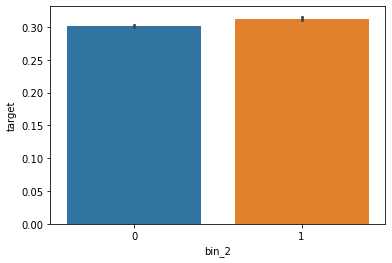

In [89]:
sns.barplot(x="bin_2",y="target",data=train);

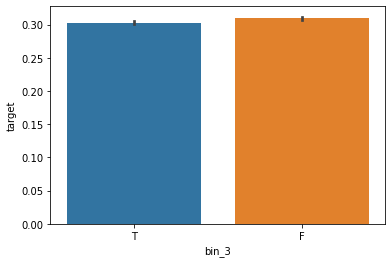

In [90]:
sns.barplot(x="bin_3",y="target",data=train);

In [91]:
train["bin_3"].unique()

array(['T', 'F'], dtype=object)

In [92]:
bin_3_mapping={"T":0,"F":1}
train["bin_3"]=train["bin_3"].map(bin_3_mapping)

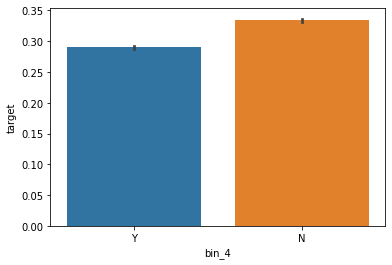

In [93]:
sns.barplot(x="bin_4",y="target",data=train);

In [94]:
bin_4_mapping={"Y":0,"N":1}
train["bin_4"]=train["bin_4"].map(bin_4_mapping)

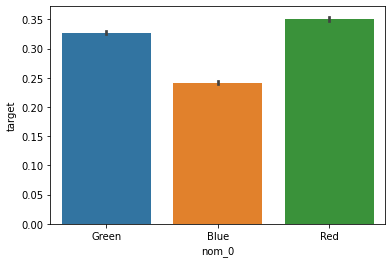

In [95]:
sns.barplot(x="nom_0",y="target",data=train);

In [96]:
nom_0_mapping={"Blue":0,"Green":1,"Red":2}
train["nom_0"]=train["nom_0"].map(nom_0_mapping)

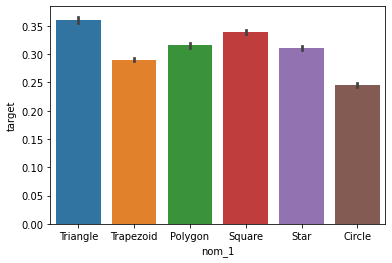

In [97]:
sns.barplot(x="nom_1",y="target",data=train);

In [98]:
nom_1_mapping={"Triangle":5,"Trapezoid":1,"Square":4,"Star":2,"Polygon":3,"Circle":0}
train["nom_1"]=train["nom_1"].map(nom_1_mapping)

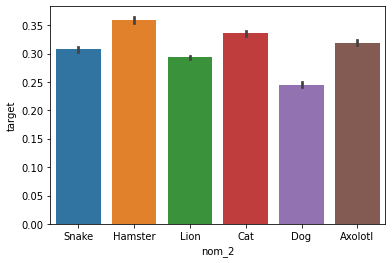

In [99]:
sns.barplot(x="nom_2",y="target",data=train);

In [100]:
train["nom_2"].unique()

array(['Snake', 'Hamster', 'Lion', 'Cat', 'Dog', 'Axolotl'], dtype=object)

In [101]:
nom_2_mapping={"Axolotl":3,"Hamster":5,"Cat":4,"Dog":0,"Lion":1,"Snake":2}
train["nom_2"]=train["nom_2"].map(nom_2_mapping)

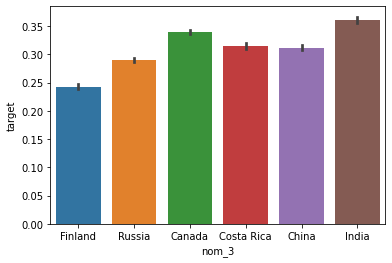

In [102]:
sns.barplot(x="nom_3",y="target",data=train);

In [103]:
train["nom_3"].unique()

array(['Finland', 'Russia', 'Canada', 'Costa Rica', 'China', 'India'],
      dtype=object)

In [104]:
nom_3_mapping={"China":2,"India":5,"Russia":1,"Canada":4,"Finland":0,"Costa Rica":3}
train["nom_3"]=train["nom_3"].map(nom_3_mapping)

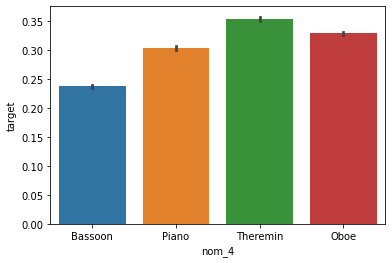

In [105]:
sns.barplot(x="nom_4",y="target",data=train);

In [106]:
train["nom_4"].unique()

array(['Bassoon', 'Piano', 'Theremin', 'Oboe'], dtype=object)

In [107]:
nom_4_mapping={"Piano":1,"Bassoon":0,"Oboe":2,"Theremin":3}
train["nom_4"]=train["nom_4"].map(nom_4_mapping)

In [108]:
#sns.barplot(x="nom_5",y="target",data=train);
#너무 많음

In [109]:
train = train.drop(["nom_5"],axis=1)

In [110]:
#sns.barplot(x="nom_6",y="target",data=train);
#너무 많음

In [111]:
train = train.drop(["nom_6"],axis=1)

In [112]:
#sns.barplot(x="nom_7",y="target",data=train);
#너무 많음

In [113]:
train = train.drop(["nom_7"],axis=1)

In [114]:
#sns.barplot(x="nom_8",y="target",data=train);
#너무 많음

In [115]:
train = train.drop(["nom_8"],axis=1)

In [116]:
#sns.barplot(x="nom_9",y="target",data=train);
#겁나 많음

In [117]:
train = train.drop(["nom_9"],axis=1)

이것을 해결하기 위하여 one hot encoding 등의 방법이 있는데 i don't know hmm so anybody someone who teach me

로딩이 오래걸리는 것을 방지하기 위해 unique를 먼저하여 돌다리를 두들겨보고 건넌다

In [118]:
train["ord_0"].unique()

array([2, 1, 3])

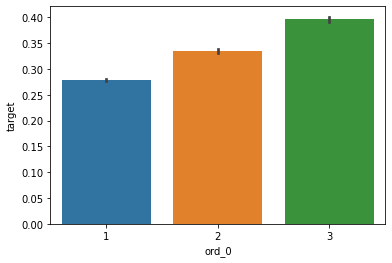

In [119]:
sns.barplot(x="ord_0",y="target",data=train);

In [120]:
train["ord_1"].unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

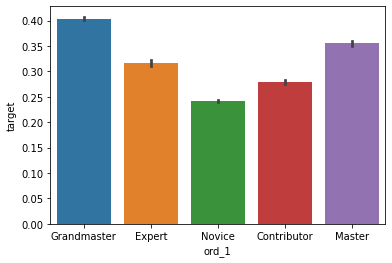

In [121]:
sns.barplot(x="ord_1",y="target",data=train);

In [122]:
ord_1_mapping={"Novice":0,"Contributor":1,"Expert":2,"Master":3,"Grandmaster":4}
train["ord_1"]=train["ord_1"].map(ord_1_mapping)

In [123]:
train["ord_2"].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

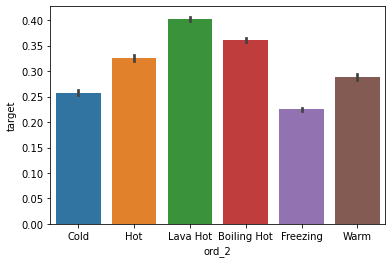

In [124]:
sns.barplot(x="ord_2",y="target",data=train);

In [125]:
ord_2_mapping={"Freezing":0,"Cold":1,"Warm":2,"Hot":3,"Boiling Hot":4,"Lava Hot":5}
train["ord_2"]=train["ord_2"].map(ord_2_mapping)

In [126]:
train["ord_3"].unique()

array(['h', 'a', 'i', 'j', 'g', 'e', 'd', 'b', 'k', 'f', 'l', 'n', 'o',
       'c', 'm'], dtype=object)

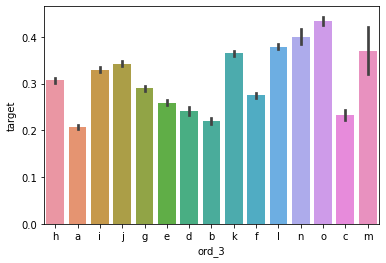

In [127]:
sns.barplot(x="ord_3",y="target",data=train);

In [128]:
ord_3_mapping={"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7,"i":8,"j":9,"k":10,"l":11,"m":12,"n":13,"o":14}
train["ord_3"]=train["ord_3"].map(ord_3_mapping)

In [129]:
train["ord_4"].unique()

array(['D', 'A', 'R', 'E', 'P', 'K', 'V', 'Q', 'Z', 'L', 'F', 'T', 'U',
       'S', 'Y', 'B', 'H', 'J', 'N', 'G', 'W', 'I', 'O', 'C', 'X', 'M'],
      dtype=object)

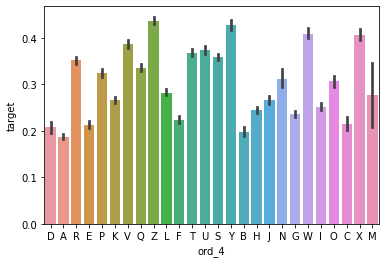

In [130]:
sns.barplot(x="ord_4",y="target",data=train);

In [131]:
ord_4_mapping={"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7,"I":8,"J":9,"K":10,"L":11,"M":12,"N":13,"O":14,"P":15,"Q":16,"R":17,"S":18,"T":19,"U":20,"V":21,"W":22,"X":23,"Y":24,"Z":25}
train["ord_4"]=train["ord_4"].map(ord_4_mapping)

In [132]:
train["ord_5"].unique()
#pass

array(['kr', 'bF', 'Jc', 'kW', 'qP', 'PZ', 'wy', 'Ed', 'qo', 'CZ', 'qX',
       'su', 'dP', 'aP', 'MV', 'oC', 'RL', 'fh', 'gJ', 'Hj', 'TR', 'CL',
       'Sc', 'eQ', 'kC', 'qK', 'dh', 'gM', 'Jf', 'fO', 'Eg', 'KZ', 'Vx',
       'Fo', 'sV', 'eb', 'YC', 'RG', 'Ye', 'qA', 'lL', 'Qh', 'Bd', 'be',
       'hT', 'lF', 'nX', 'kK', 'av', 'uS', 'Jt', 'PA', 'Er', 'Qb', 'od',
       'ut', 'Dx', 'Xi', 'on', 'Dc', 'sD', 'rZ', 'Uu', 'sn', 'yc', 'Gb',
       'Kq', 'dQ', 'hp', 'kL', 'je', 'CU', 'Fd', 'PQ', 'Bn', 'ex', 'hh',
       'ac', 'rp', 'dE', 'oG', 'oK', 'cp', 'mm', 'vK', 'ek', 'dO', 'XI',
       'CM', 'Vf', 'aO', 'qv', 'jp', 'Zq', 'Qo', 'DN', 'TZ', 'ke', 'cG',
       'tP', 'ud', 'tv', 'aM', 'xy', 'lx', 'To', 'uy', 'ZS', 'vy', 'ZR',
       'AP', 'GJ', 'Wv', 'ri', 'qw', 'Xh', 'FI', 'nh', 'KR', 'dB', 'BE',
       'Bb', 'mc', 'MC', 'tM', 'NV', 'ih', 'IK', 'Ob', 'RP', 'dN', 'us',
       'dZ', 'yN', 'Nf', 'QM', 'jV', 'sY', 'wu', 'SB', 'UO', 'Mx', 'JX',
       'Ry', 'Uk', 'uJ', 'LE', 'ps', 'kE', 'MO', 'k

In [133]:
train = train.drop(["ord_5"],axis=1)

In [134]:
train["day"].unique()

array([2, 7, 5, 4, 3, 1, 6])

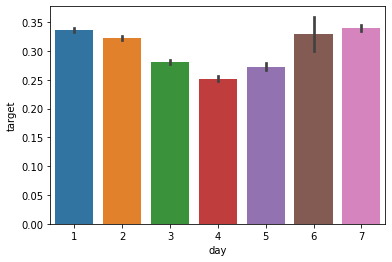

In [135]:
sns.barplot(x="day",y="target",data=train);

In [136]:
train["month"].unique()

array([ 2,  8,  1,  4, 10,  3,  7,  9, 12, 11,  5,  6])

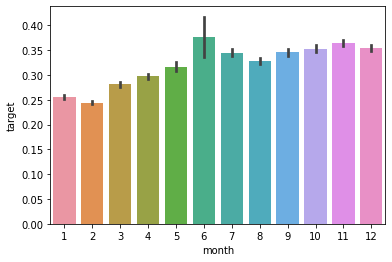

In [137]:
sns.barplot(x="month",y="target",data=train);

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      300000 non-null  int64
 1   bin_0   300000 non-null  int64
 2   bin_1   300000 non-null  int64
 3   bin_2   300000 non-null  int64
 4   bin_3   300000 non-null  int64
 5   bin_4   300000 non-null  int64
 6   nom_0   300000 non-null  int64
 7   nom_1   300000 non-null  int64
 8   nom_2   300000 non-null  int64
 9   nom_3   300000 non-null  int64
 10  nom_4   300000 non-null  int64
 11  ord_0   300000 non-null  int64
 12  ord_1   300000 non-null  int64
 13  ord_2   300000 non-null  int64
 14  ord_3   300000 non-null  int64
 15  ord_4   300000 non-null  int64
 16  day     300000 non-null  int64
 17  month   300000 non-null  int64
 18  target  300000 non-null  int64
dtypes: int64(19)
memory usage: 43.5 MB


In [139]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

In [140]:
test["bin_3"]=test["bin_3"].map(bin_3_mapping)
test["bin_4"]=test["bin_4"].map(bin_4_mapping)
test["nom_0"]=test["nom_0"].map(nom_0_mapping)
test["nom_1"]=test["nom_1"].map(nom_1_mapping)
test["nom_2"]=test["nom_2"].map(nom_2_mapping)
test["nom_3"]=test["nom_3"].map(nom_3_mapping)
test["nom_4"]=test["nom_4"].map(nom_4_mapping)
test["ord_1"]=test["ord_1"].map(ord_1_mapping)
test["ord_2"]=test["ord_2"].map(ord_2_mapping)
test["ord_3"]=test["ord_3"].map(ord_3_mapping)
test["ord_4"]=test["ord_4"].map(ord_4_mapping)
test = test.drop(["nom_5"],axis=1)
test = test.drop(["nom_6"],axis=1)
test = test.drop(["nom_7"],axis=1)
test = test.drop(["nom_8"],axis=1)
test = test.drop(["nom_9"],axis=1)
test = test.drop(["ord_5"],axis=1)
test = test.drop(["day"],axis=1)
test = test.drop(["month"],axis=1)
train = train.drop(["day"],axis=1)
train = train.drop(["month"],axis=1)

In [141]:
X=train.drop(['target'],axis=1)
y=train["target"]

In [142]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [143]:
#from sklearn.metrics import accuracy_score
#정확도 분류 점수

In [144]:
from sklearn.metrics import roc_auc_score

In [145]:
"""rforest = RandomForestClassifier()
rforest.fit(train_X, train_y)
pred_y=rforest.predict(val_X)
roc_rforest=roc_auc_score(val_y,pred_y)
print(roc_rforest)"""

'rforest = RandomForestClassifier()\nrforest.fit(train_X, train_y)\npred_y=rforest.predict(val_X)\nroc_rforest=roc_auc_score(val_y,pred_y)\nprint(roc_rforest)'

In [146]:
"""logreg = LogisticRegression()
logreg.fit(train_X, train_y)
pred_y=logreg.predict(val_X)
roc_logreg=roc_auc_score(val_y,pred_y)
print(roc_logreg)"""

'logreg = LogisticRegression()\nlogreg.fit(train_X, train_y)\npred_y=logreg.predict(val_X)\nroc_logreg=roc_auc_score(val_y,pred_y)\nprint(roc_logreg)'

In [147]:
"""porsche = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
porsche.fit(train_X, train_y)
pred_y = porsche.predict(val_X)
roc_DTR=roc_auc_score(val_y,pred_y)
print(roc_DTR)"""

'porsche = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)\nporsche.fit(train_X, train_y)\npred_y = porsche.predict(val_X)\nroc_DTR=roc_auc_score(val_y,pred_y)\nprint(roc_DTR)'

In [148]:
"""pagani = RandomForestRegressor(random_state=1)
pagani.fit(train_X, train_y)
pred_y = pagani.predict(val_X)
roc_forestd=roc_auc_score(val_y,pred_y)
print(roc_forestd)"""

'pagani = RandomForestRegressor(random_state=1)\npagani.fit(train_X, train_y)\npred_y = pagani.predict(val_X)\nroc_forestd=roc_auc_score(val_y,pred_y)\nprint(roc_forestd)'

In [149]:
"""from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=4)
xgb_model.fit(train_X, train_y, 
             early_stopping_rounds=10, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
xgb_pred = xgb_model.predict(val_X)
print(roc_auc_score(val_y, xgb_pred))"""


'from xgboost import XGBRegressor\nxgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=4)\nxgb_model.fit(train_X, train_y, \n             early_stopping_rounds=10, \n             eval_set=[(val_X, val_y)], \n             verbose=False)\nxgb_pred = xgb_model.predict(val_X)\nprint(roc_auc_score(val_y, xgb_pred))'

In [150]:
from sklearn.linear_model import LinearRegression
ferrari = LinearRegression()
ferrari.fit(train_X, train_y)
pred_y = ferrari.predict(val_X)
roc_linear=roc_auc_score(val_y,pred_y)
print(roc_linear)

0.7280445504729106


In [151]:
sample_submission

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5
...,...
499995,0.5
499996,0.5
499997,0.5


In [152]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      200000 non-null  int64
 1   bin_0   200000 non-null  int64
 2   bin_1   200000 non-null  int64
 3   bin_2   200000 non-null  int64
 4   bin_3   200000 non-null  int64
 5   bin_4   200000 non-null  int64
 6   nom_0   200000 non-null  int64
 7   nom_1   200000 non-null  int64
 8   nom_2   200000 non-null  int64
 9   nom_3   200000 non-null  int64
 10  nom_4   200000 non-null  int64
 11  ord_0   200000 non-null  int64
 12  ord_1   200000 non-null  int64
 13  ord_2   200000 non-null  int64
 14  ord_3   200000 non-null  int64
 15  ord_4   200000 non-null  int64
dtypes: int64(16)
memory usage: 24.4 MB


In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      200000 non-null  int64
 1   bin_0   200000 non-null  int64
 2   bin_1   200000 non-null  int64
 3   bin_2   200000 non-null  int64
 4   bin_3   200000 non-null  int64
 5   bin_4   200000 non-null  int64
 6   nom_0   200000 non-null  int64
 7   nom_1   200000 non-null  int64
 8   nom_2   200000 non-null  int64
 9   nom_3   200000 non-null  int64
 10  nom_4   200000 non-null  int64
 11  ord_0   200000 non-null  int64
 12  ord_1   200000 non-null  int64
 13  ord_2   200000 non-null  int64
 14  ord_3   200000 non-null  int64
 15  ord_4   200000 non-null  int64
dtypes: int64(16)
memory usage: 24.4 MB


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      300000 non-null  int64
 1   bin_0   300000 non-null  int64
 2   bin_1   300000 non-null  int64
 3   bin_2   300000 non-null  int64
 4   bin_3   300000 non-null  int64
 5   bin_4   300000 non-null  int64
 6   nom_0   300000 non-null  int64
 7   nom_1   300000 non-null  int64
 8   nom_2   300000 non-null  int64
 9   nom_3   300000 non-null  int64
 10  nom_4   300000 non-null  int64
 11  ord_0   300000 non-null  int64
 12  ord_1   300000 non-null  int64
 13  ord_2   300000 non-null  int64
 14  ord_3   300000 non-null  int64
 15  ord_4   300000 non-null  int64
 16  target  300000 non-null  int64
dtypes: int64(17)
memory usage: 38.9 MB


In [155]:
lamborghini = LinearRegression()
lamborghini.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
test_preds = lamborghini.predict(test)
output = pd.DataFrame({'id': test["id"], 'target': test_preds})
output.to_csv('lamborghini-dog.csv', index=False)